# Phân cụm K-Means và xuất ra file excel (Machine Learning)

Tham thảo từ project của João Nuno Carvalho

## Hướng dẫn:

Yêu cầu:\
    - Cài đặt môi trường Jupyter thông qua pip hoặc anaconda.


Thực hiện:\
1º Nhận dữ liệu đầu vào là một tập dữ liệu dạng csv.
Thêm vào cuối tập dữ liệu một cột mới là cột phân cụm mà dòng dữ liệu đó thuộc về.

2º Lưu file kết quả thành dạng csv.

3º Mở terminal trong thư mục chứa script này và chạy lệnh jupyter notebook.

4º Thay đổi input thành file csv tương ứng, cũng như là các biến phụ thuộc.

5º Thực hiện tất cả các cells để nhận được kết quả.

6º Kiểm tra file kết quả bằng excel.

## DataSet

Car Dataset  (13 cột dữ liệu).


In [3]:
# Import các thư viện cần thiết.
import numpy as np
import pandas as pd

In [4]:
# Số cụm, file dữ liệu, mảng các cột cần loại trừ.
num_clusters = 5
filename = "car_list.csv"

In [5]:
# Đọc file CSV bằng thư viện Pandas.
path_dir = "./"
dataframe = pd.read_csv( path_dir + filename, sep = ',' ) # "ISO-8859-1")
df = dataframe.copy(deep=True)
df.head(5)

,name,brand,price,img,id,features,place,year,age,outcome
0,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,2020,41,31420.0
1,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,2020,56,28947.0
2,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,2020,30,28273.0
3,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,2020,32,29941.0
4,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,2020,27,29225.0


In [6]:
df = df.drop("age", 1)
df = df.drop("outcome", 1)
df = df.drop("year", 1)

df.head(5)

,name,brand,price,img,id,features,place
0,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM
1,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM
2,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM
3,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM
4,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM


In [7]:
# Thực hiện thuật toán gom cụm KMeans bằng thư viện sklearn
from sklearn.cluster import KMeans

# Thực hiện giải thuật KMeans
km = KMeans(n_clusters=num_clusters, random_state=1)
new = df._get_numeric_data()
km.fit(new)
predict=km.predict(new)
df_kmeans = df.copy(deep=True)
df_kmeans['Cluster'] = pd.Series(predict, index=df_kmeans.index)
df_kmeans.head(20)

,name,brand,price,img,id,features,place,Cluster
0,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,0
1,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,0
2,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,0
3,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,0
4,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,0
5,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,0
6,Ford Ranger XLS 2.2L 4x2 AT - 2020,Ford,26501.0,https://bonbanh.com.vn/uploads/users/357399/ca...,Mã: 2775801,"Ford Ranger Động cơ 2.2L Công suất 160 mã lực,...",TP HCM,0
7,Honda Brio RS - 2019,Honda,19368.0,https://bonbanh.com.vn/uploads/users/26623/car...,Mã: 1242062,Honda Brio RS\n- Giá chỉ từ: 150 TRIỆU\n- Khuy...,TP HCM,0
8,Honda Brio RS - 2019,Honda,19368.0,https://bonbanh.com.vn/uploads/users/26623/car...,Mã: 1242062,Honda Brio RS\n- Giá chỉ từ: 150 TRIỆU\n- Khuy...,TP HCM,0
9,Honda Brio RS - 2019,Honda,19368.0,https://bonbanh.com.vn/uploads/users/26623/car...,Mã: 1242062,Honda Brio RS\n- Giá chỉ từ: 150 TRIỆU\n- Khuy...,TP HCM,0


In [8]:
# Xuất kết quả gom cụm thành file csv

df_kmeans_orig = dataframe.copy(deep=True)
df_kmeans_orig['Cluster'] = pd.Series(predict, index=df_kmeans.index)

df_kmeans_orig = df_kmeans_orig.fillna("")           # assigns df to a new dataframe

filename_kmenas = filename[0:-4] + "_kmeans_" + str(num_clusters) + ".csv"
path_kmeans = path_dir + filename_kmenas
df_kmeans_orig.to_csv(path_or_buf = path_kmeans, sep = ",")
print("The file was generated!")

The file was generated!


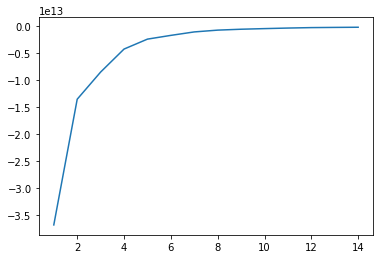

In [9]:
# Triền khai phương pháp Elbow
# Đây là phương pháp để xác định số cụm tối ưu cho tập quá trình gom cụm
# Kết quả sẽ được hiển thị bằng đồ thị

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

Ks = range(1, 15)
km = [KMeans(n_clusters=i, random_state=1) for i in Ks]
my_matrix = df._get_numeric_data()
score = [km[i].fit(my_matrix).score(my_matrix) for i in range(len(km))]

plt.plot(Ks, score)
plt.show()